# EDA

Importando librerias a usar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
reviews = [r'rev_parquet\rev_arts.parquet', r'rev_parquet\rev_electronics.parquet', r'rev_parquet\rev_movies_tv.parquet', r'rev_parquet\rev_software.parquet']
metadata = ['meta_parquet\meta_arts.parquet', 'meta_parquet\meta_electronics.parquet', 'meta_parquet\meta_movie.parquet', 'meta_parquet\meta_software.parquet']

## Tratamiento de duplicados

### Reviews

In [3]:
dataframes = []
for w in reviews:
    df = pd.read_parquet(w)
    dataframes.append(df)

In [4]:
joined_dfs = pd.concat(dataframes)

In [14]:
joined_dfs.shape

(3989389, 7)

In [8]:
joined_dfs[joined_dfs.duplicated(subset=['reviewerID','reviewText','unixReviewTime'])]

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,temp
79254,A23O8T3LNL9YY8,B00020X94M,I bought this video because I do know how to k...,4.0,Very Informative but....,1106611200,2005-01-25
97850,A20EEWWSFMZ1PN,B00020X94M,I purchased this DVD because I thought I might...,5.0,I had no idea!,1113523200,2005-04-15
124987,AYPCGRSNA2IL,6301977173,I would love to buy this movie as I have been ...,1.0,Why no Widescreen?,1123286400,2005-08-06
157040,A25MN5DG191IL6,B00020X94M,The background music for much of the DVD is no...,1.0,I could not hear a thing they said.,1134345600,2005-12-12
161760,A28ZDT16XR5DPC,B00020X94M,For Christmas I wanted to get my wife some vid...,1.0,Its too bad I can not give 0 stars.,1135987200,2005-12-31
...,...,...,...,...,...,...,...
285646,A1M7Y63Y5GYJI1,B00JC5Y6YA,"First, I'm both an OpenOffice and a Microsoft ...",4.0,Great Alternative to MS Office,1404691200,NaT
285649,A2XSDXVXI466XL,B00JC5Y6YA,I occasionally need to use MS Word (my univers...,5.0,Still the best word processing program,1401321600,NaT
285650,A10H24TDLK2VDP,B00JC5Y6YA,My last MS Office suite was Office 2010. Like ...,5.0,A solid alternative to MS Office,1402099200,NaT
285651,A10U8DJAPJJI8I,B00JC5Y6YA,I had previously written a review on this item...,3.0,Office On The Cheap,1404000000,NaT


In [11]:
joined_dfs[joined_dfs.duplicated(keep='first')].sort_values('unixReviewTime')

### Metadata

In [5]:
metadata_dfs = []
for x in metadata:
    df = pd.read_parquet(x)
    metadata_dfs.append(df)

In [6]:
joined_metadfs = pd.concat(metadata_dfs)

In [19]:
joined_metadfs.shape

(552540, 8)

In [20]:
joined_dfs.asin.nunique()

241982

In [18]:
joined_metadfs[joined_metadfs.duplicated(subset=['asin'])]

,asin,related,title,price,salesRank,brand,categories,description
4254,093527863X,"{'also_bought': ['0935278621', '0935278966', '...",Pants for Real People: Sewing Techniques,22.46,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Sewing], [Movies & TV...",Providing helpful commentary&#160;for creating...
5692,1440305234,"{'also_bought': ['1440319286', '1440319294', '...",Painting Oil Portraits in Warm Light with Chri...,28.28,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Art Supplies, Paintin...",YouaTMll Love This Portrait Painting DVD If: Y...
5693,144030307X,"{'also_bought': ['1440327033', '1581808046', '...",Nancy Reyner's Acrylic Revolution: Watercolor ...,26.99,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Art Supplies, Paintin...","Many exciting, new and contemporary looks can ..."
5695,1440307822,None,Drawing the Clothed Figure with Joy Thomas,26.99,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Art Supplies, Paintin...",Follow along as Joy demonstrates drawing a ful...
5697,144030713X,"{'also_bought': ['1440307105', '144030839X', '...",Three Stages for Successful Pastel Paintings w...,26.99,"{'Arts, Crafts & Sewing': None, 'Books': None,...",None,"[[Arts, Crafts & Sewing, Craft Supplies, Weavi...",You'll Love This Pastel Painting DVD If: You l...
...,...,...,...,...,...,...,...,...
12125,B001JH7FFQ,None,None,NaN,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Movies & TV, Movies], [Software, Design & Il...",DV Award of Excellence- 5 Diamonds! I admit it...
14881,B004YG7JPK,"{'also_bought': None, 'also_viewed': ['B0084JD...",None,49.99,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Movies & TV, Movies], [Software, Design & Il...",Photographer David Hobby of Strobist.com follo...
14883,B004YG7J78,"{'also_bought': ['0321580141', 'B0009BX0AM', '...",None,35.83,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Movies & TV, Movies], [Software, Design & Il...","For the past three decades, photographer Joe M..."
15606,B006C9CEA2,"{'also_bought': ['B00B4AUF3M', 'B007R83VKE', '...",None,49.99,"{'Arts, Crafts & Sewing': None, 'Automotive': ...",None,"[[Arts, Crafts & Sewing, Scrapbooking], [Softw...",This card contains a scratch-off license key c...


## Nulos

### Reviews

In [27]:
joined_dfs.isna().sum()

reviewerID        0
asin              0
reviewText        0
overall           0
summary           0
unixReviewTime    0
dtype: int64

In [28]:
joined_dfs.shape

(3989389, 6)

### Metadata

In [23]:
joined_metadfs.isna().sum()

asin                0
related        141569
title          219743
price          137298
salesRank       14667
brand          439529
categories          0
description     72043
dtype: int64

In [24]:
joined_metadfs.shape

(552540, 8)

se observa que revies no contiene nulos y los nulos presentes en el metadata serán filtrados o ignorados en su debido momento.

# Distribución de datos

## Reviews

In [29]:
joined_dfs['year'] = joined_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).year)
joined_dfs['month'] = joined_dfs['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).month)

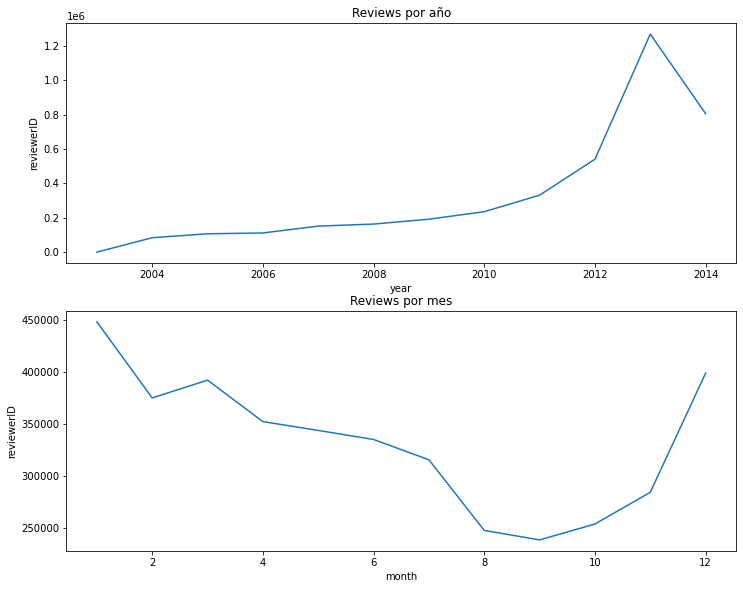

In [30]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt.title('Reviews por año')
sns.lineplot(data=joined_dfs.groupby('year').count(),
             x='year',
             y='reviewerID')

plt.subplot(3,1,2)
plt.title('Reviews por mes')
sns.lineplot(data=joined_dfs.groupby('month').count(),
             x='month',
             y='reviewerID'
)

plt.show()

### Calificaciones

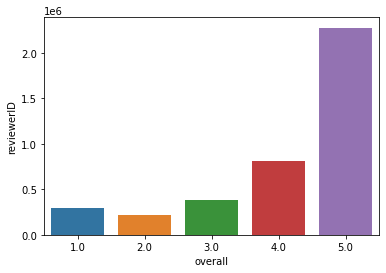

In [7]:
sns.barplot(
    data=joined_dfs.groupby('overall').count().reset_index(),
    x='overall',
    y='reviewerID'
)
plt.show()

Promedio de reviews cor cada usuario

In [8]:
joined_dfs.groupby('reviewerID').count()['asin'].mean()

5.01180781861261

## Metadata

Distribución de precios

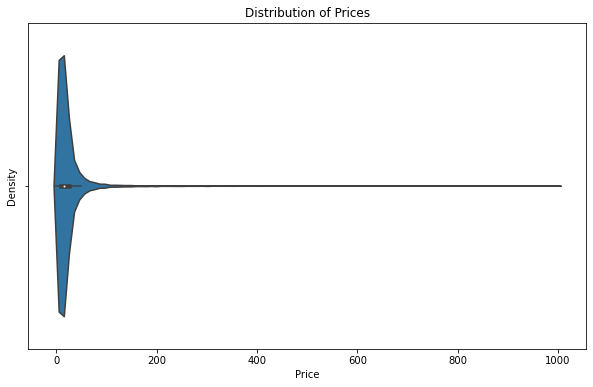

In [17]:
plt.figure(figsize=(10, 6))

sns.violinplot(data=joined_metadfs, x='price')

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# ETL